# Example of Simpson's paradox in `matplotlib`

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

## Data

In [2]:
nr_of_samples = 100
x1 = np.random.uniform(0, 1, nr_of_samples)
x2 = np.random.uniform(0.25, 1.25, nr_of_samples)
x3 = np.random.uniform(0.50, 1.50, nr_of_samples)
x4 = np.random.uniform(0.75, 1.75, nr_of_samples)
x5 = np.random.uniform(1.00, 2.00, nr_of_samples)
x6 = np.random.uniform(1.25, 2.25, nr_of_samples)



In [3]:
df = pd.concat(
    [
        pd.DataFrame.from_dict(
            {
                "x": x1,
                "y": -1*x1 + np.random.uniform(-.4, .4, nr_of_samples),
                "category": "A"
            },
            orient="columns"
        ),
        pd.DataFrame.from_dict(
            {
                "x": x2,
                "y": -1*x2 + np.random.uniform(-.4, .4, nr_of_samples) + 0.8,
                "category": "B"
            },
            orient="columns"
        ),
        pd.DataFrame.from_dict(
            {
                "x": x3,
                "y": -1*x3 + np.random.uniform(-.4, .4, nr_of_samples) + 1.6,
                "category": "C"
            },
            orient="columns"
        ),
        pd.DataFrame.from_dict(
            {
                "x": x4,
                "y": -1*x4 + np.random.uniform(-.4, .4, nr_of_samples) + 2.4,
                "category": "D"
            },
            orient="columns"
        ),
        pd.DataFrame.from_dict(
            {
                "x": x5,
                "y": -1*x5 + np.random.uniform(-.4, .4, nr_of_samples) + 3.2,
                "category": "E"
            },
            orient="columns"
        ),
        pd.DataFrame.from_dict(
            {
                "x": x6,
                "y": -1*x6 + np.random.uniform(-.4, .4, nr_of_samples) + 4.0,
                "category": "F"
            },
            orient="columns"
        )
    ],
    axis=0,
    ignore_index=True
)

df

,x,y,category
0,0.400375,-0.711325,A
1,0.579262,-0.572485,A
2,0.174527,0.185626,A
3,0.190958,-0.283394,A
4,0.049282,-0.150699,A
...,...,...,...
595,2.238422,1.804184,F
596,1.344929,2.832199,F
597,1.316623,2.992076,F
598,1.452990,2.915497,F


In [4]:
res_all = stats.linregress(df["x"], df["y"])

## Plot 1: aggregated data

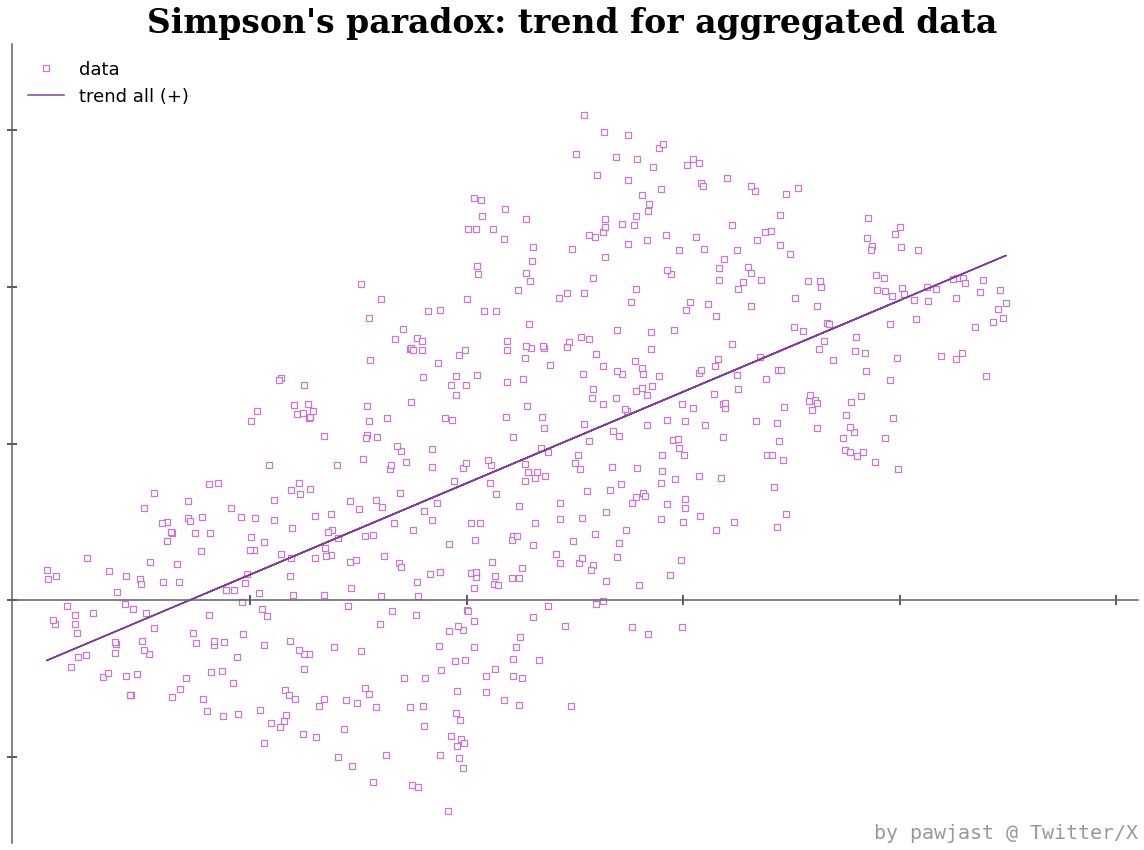

In [5]:
fig, ax = plt.subplots(
    figsize=(16,12),
    facecolor="white"
)
fig.suptitle(
    "Simpson's paradox: trend for aggregated data",
    fontsize=33,
    fontfamily="serif",
    weight="bold"
)

ax.plot(
    df["x"], df["y"],
    marker="s",
    markerfacecolor="white",
    markeredgecolor="#c061cb",
    markeredgewidth=1.25,
    alpha=0.85,
    linestyle="None",
    label="data"
)
ax.plot(
    df["x"], res_all.slope*df["x"] + res_all.intercept,
    marker="None",
    color="#813d9c",
    linestyle="-",
    linewidth=1.5,
    label="trend all (+)"
)

ax.set_xlim(-0.05, 2.55)
ax.set_ylim(-1.55, 3.55)

ax.set_xticks(
    ticks=np.arange(0.5, 3.0, 0.5),
    labels=""
)
ax.set_yticks(
    ticks=np.arange(-1, 4, 1),
    labels=""
)

ax.tick_params(
    axis="both",
    direction="inout",
    width=2,
    length=10,
    color="#5e5c64"
)

# Update spines thickness and move them to the center
for position in ["left", "bottom"]:
    ax.spines[position].set_linewidth(1.5)
    ax.spines[position].set_color("#5e5c64")

ax.spines["bottom"].set_position("zero")

# Remove spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)


ax.legend(
    loc="upper left",
    fontsize=18,
    frameon=False
)

plt.tight_layout()

# Footer
ax.text(
    1, 0,
    "by pawjast @ Twitter/X",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=20,
    family="monospace",
    weight="medium"
)

plt.savefig(
    fname="1.png",
    format="png",
    dpi=125
);

## Plot 2: data by groups

In [6]:
grouped = df.groupby("category")

In [7]:
all_colours = iter(
    [
        "#3584e4",  # blue
        "#33d17a",  # green
        "#f6d32d",  # yellow
        "#ff7800",  # orange
        "#e01b24",  # red
        "#986a44"  # brown
    ]
)

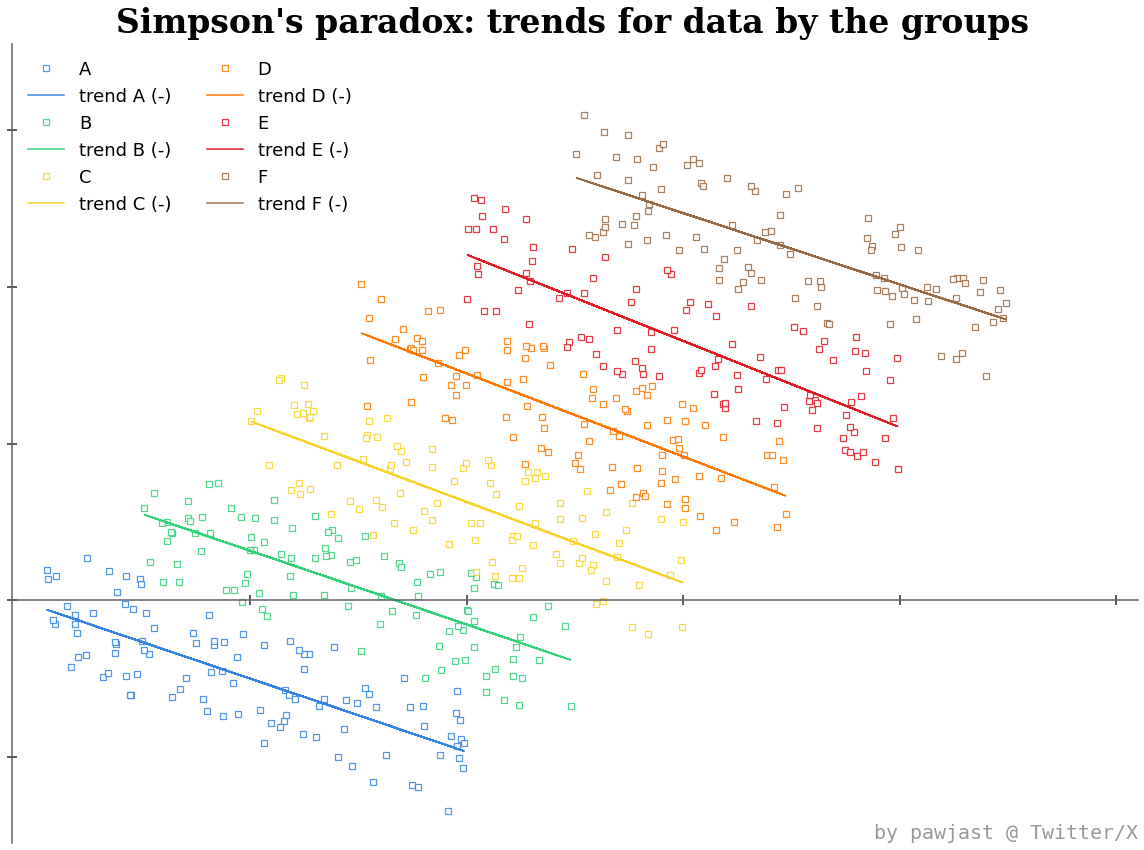

In [8]:

fig, ax = plt.subplots(
    figsize=(16,12),
    facecolor="white"
)
fig.suptitle(
    "Simpson's paradox: trends for data by the groups",
    fontsize=33,
    fontfamily="serif",
    weight="bold"
)

for name, group in grouped:
    # Linear regression for the group
    res = stats.linregress(group["x"], group["y"])

    # colour
    col = next(all_colours)

    ax.plot(
        group["x"], group["y"],
        marker="s",
        markerfacecolor="white",
        markeredgecolor=col,
        markeredgewidth=1.25,
        alpha=0.85,
        linestyle="None",
        label=name
    )
    ax.plot(
        group["x"], res.slope*group["x"] + res.intercept,
        marker="None",
        color=col,
        linestyle="-",
        linewidth=1.5,
        label=f"trend {name} (-)"
    )

ax.set_xlim(-0.05, 2.55)
ax.set_ylim(-1.55, 3.55)

ax.set_xticks(
    ticks=np.arange(0.5, 3.0, 0.5),
    labels=""
)
ax.set_yticks(
    ticks=np.arange(-1, 4, 1),
    labels=""
)

ax.tick_params(
    axis="both",
    direction="inout",
    width=2,
    length=10,
    color="#5e5c64"
)

# Update spines thickness and move them to the center
for position in ["left", "bottom"]:
    ax.spines[position].set_linewidth(1.5)
    ax.spines[position].set_color("#5e5c64")

ax.spines["bottom"].set_position("zero")

# Remove spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)


ax.legend(
    loc="upper left",
    fontsize=18,
    frameon=False,
    ncols=2
)

plt.tight_layout()

# Footer
ax.text(
    1, 0,
    "by pawjast @ Twitter/X",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=20,
    family="monospace",
    weight="medium"
)

plt.savefig(
    fname="2.png",
    format="png",
    dpi=125
);

## Plot 3: aggregated trend vs trend in groups

In [9]:
all_colours = iter(
    [
        "#3584e4",  # blue
        "#33d17a",  # green
        "#f6d32d",  # yellow
        "#ff7800",  # orange
        "#e01b24",  # red
        "#986a44"  # brown
    ]
)

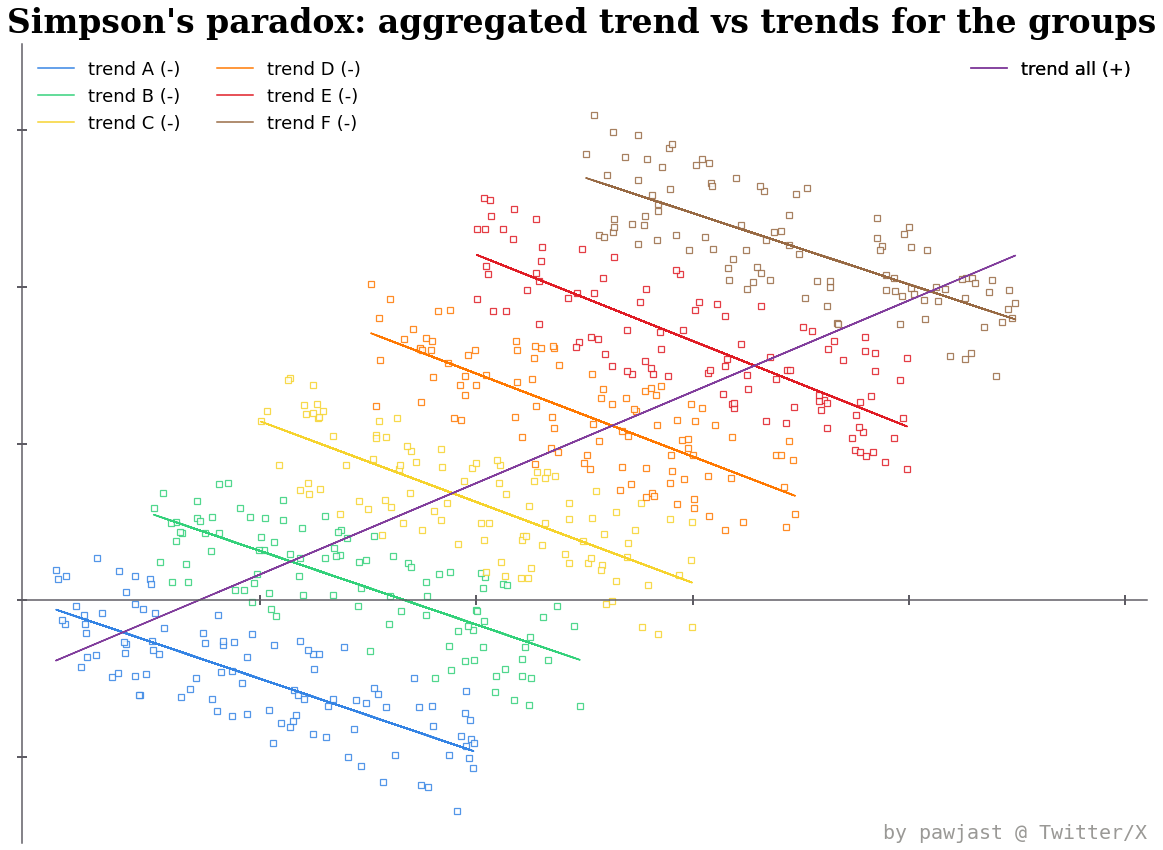

In [10]:

fig, ax = plt.subplots(
    figsize=(16,12),
    facecolor="white"
)
fig.suptitle(
    "Simpson's paradox: aggregated trend vs trends for the groups",
    fontsize=33,
    fontfamily="serif",
    weight="bold"
)

for name, group in grouped:
    # Linear regression for the group
    res = stats.linregress(group["x"], group["y"])

    # colour
    col = next(all_colours)

    ax.plot(
        group["x"], group["y"],
        marker="s",
        markerfacecolor="white",
        markeredgecolor=col,
        markeredgewidth=1.25,
        alpha=0.85,
        linestyle="None",
        # label=name
    )
    ax.plot(
        group["x"], res.slope*group["x"] + res.intercept,
        marker="None",
        color=col,
        linestyle="-",
        linewidth=1.5,
        label=f"trend {name} (-)"
    )

ax.set_xlim(-0.05, 2.55)
ax.set_ylim(-1.55, 3.55)

ax.set_xticks(
    ticks=np.arange(0.5, 3.0, 0.5),
    labels=""
)
ax.set_yticks(
    ticks=np.arange(-1, 4, 1),
    labels=""
)

ax.tick_params(
    axis="both",
    direction="inout",
    width=2,
    length=10,
    color="#5e5c64"
)

# Update spines thickness and move them to the center
for position in ["left", "bottom"]:
    ax.spines[position].set_linewidth(1.5)
    ax.spines[position].set_color("#5e5c64")

ax.spines["bottom"].set_position("zero")

# Remove spines
for position in ["top", "right"]:
    ax.spines[position].set_visible(False)


leg_1 = ax.legend(
    loc="upper left",
    fontsize=18,
    frameon=False,
    ncols=2
)

# Add main trend again
line_trend = ax.plot(
    df["x"], res_all.slope*df["x"] + res_all.intercept,
    marker="None",
    color="#813d9c",
    linestyle="-",
    linewidth=1.5,
    label="trend all (+)"
)

leg_2 = ax.legend(
    line_trend,
    ["trend all (+)"],
    loc="upper right",
    fontsize=18,
    frameon=False
)
ax.add_artist(leg_1)
ax.add_artist(leg_2)

plt.tight_layout()

# Footer
ax.text(
    1, 0,
    "by pawjast @ Twitter/X",
    transform = ax.transAxes,
    horizontalalignment="right",
    verticalalignment="bottom",
    color="#9a9996",
    fontsize=20,
    family="monospace",
    weight="medium"
)

plt.savefig(
    fname="3.png",
    format="png",
    dpi=125
);